/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/torch/nn/modules/lazy.py:175: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/torch_geometric/nn/conv/hetero_conv.py:53: UserWarning: There exist node types ({'obstacle'}) whose representations do not get updated during message passing as they do not occur as destination type in any edge type. This may lead to unexpected behaviour.
  warnings.warn(


----------------------------------------
0 0.03161448612809181 0.03161448612809181 (array([], dtype=int64),) (array([], dtype=int64),) set()
1 0.05372951924800873 0.05372951924800873 (array([], dtype=int64),) (array([], dtype=int64),) set()
2 0.0598723441362381 0.0598723441362381 (array([], dtype=int64),) (array([], dtype=int64),) set()
3 0.08965055644512177 0.08965055644512177 (array([], dtype=int64),) (array([], dtype=int64),) set()
4 0.11615990847349167 0.11615990847349167 (array([], dtype=int64),) (array([], dtype=int64),) set()
5 0.148211270570755 0.148211270570755 (array([], dtype=int64),) (array([], dtype=int64),) set()
6 0.1863020658493042 0.1863020658493042 (array([], dtype=int64),) (array([], dtype=int64),) set()
7 0.22531405091285706 0.22531405091285706 (array([], dtype=int64),) (array([], dtype=int64),) set()
8 0.25357717275619507 0.25357717275619507 (array([], dtype=int64),) (array([], dtype=int64),) set()
9 0.2696532905101776 0.2696532905101776 (array([], dtype=int64),) (

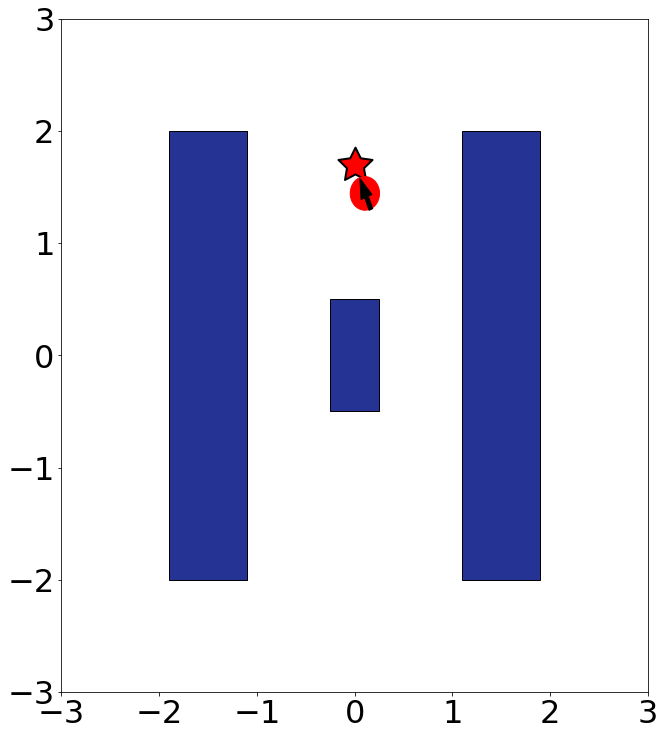

In [1]:
from dynamic_dubins import *
import os
env = create_env()
bnn = create_network()
bnn.load_state_dict(torch.load(BMODEL_PATH, map_location=device))
bnn.eval();


VERBOSE = True
SAVE_GIF = True


if SAVE_GIF:
    gif_file = f'gifs/0817/{project_name}_{version_name}.gif'
    os.makedirs(gif_file, exist_ok=True)
else:
    gif_file = None
collided, done, path = infer(env,bnn,verbose=VERBOSE,n_action=10000, seed=300,
                             max_episode_length=512,
                             spatial_prop=False,lie_derive_safe=False,decompose=None,
                             stop_at_collision=False,need_gif=gif_file)

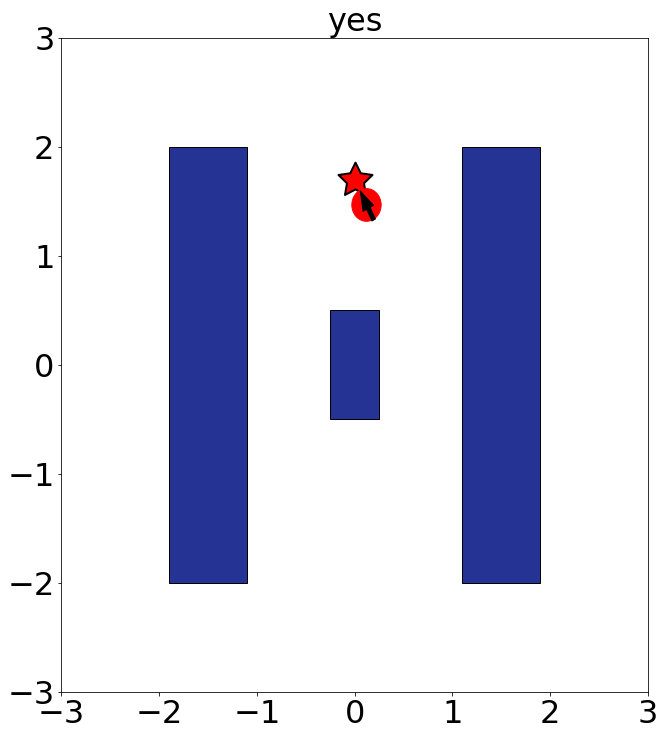

In [2]:
env.save_fig(path, env.world.agent_goals, env.world.obstacles, 'gifs/0817/shit.mp4', title='yes')

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/torch/nn/modules/lazy.py:175: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/torch_geometric/nn/conv/hetero_conv.py:53: UserWarning: There exist node types ({'obstacle'}) whose representations do not get updated during message passing as they do not occur as destination type in any edge type. This may lead to unexpected behaviour.
  warnings.warn(


----------------------------------------
0 0.18955355882644653 0.18955355882644653 (array([], dtype=int64),) (array([], dtype=int64),) set()
1 0.21328800916671753 0.21328800916671753 (array([], dtype=int64),) (array([], dtype=int64),) set()
2 0.22266077995300293 0.22266077995300293 (array([], dtype=int64),) (array([], dtype=int64),) set()
3 0.2594169080257416 0.2594169080257416 (array([], dtype=int64),) (array([], dtype=int64),) set()
4 0.2799723148345947 0.2799723148345947 (array([], dtype=int64),) (array([], dtype=int64),) set()
5 0.30295562744140625 0.30295562744140625 (array([], dtype=int64),) (array([], dtype=int64),) set()
6 0.3035617172718048 0.3035617172718048 (array([], dtype=int64),) (array([], dtype=int64),) set()
7 0.2977259159088135 0.2977259159088135 (array([], dtype=int64),) (array([], dtype=int64),) set()
8 0.28895303606987 0.28895303606987 (array([], dtype=int64),) (array([], dtype=int64),) set()
9 0.26875168085098267 0.26875168085098267 (array([], dtype=int64),) (arra

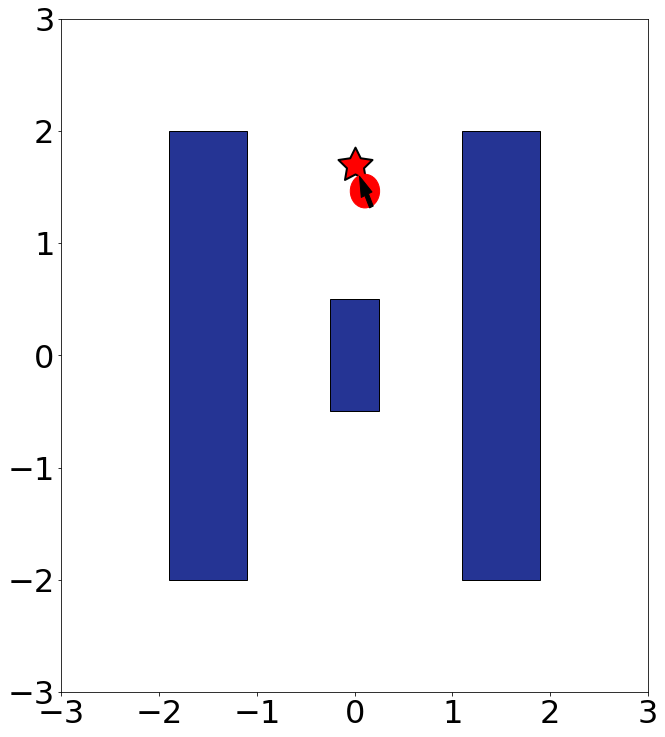

In [3]:
from dynamic_dubins import *
import os
env = create_env()
bnn = create_network()
bnn.load_state_dict(torch.load(BMODEL_PATH, map_location=device))
bnn.eval();


VERBOSE = True
SAVE_GIF = True


if SAVE_GIF:
    gif_file = f'gifs/0817/{project_name}_{version_name}.gif'
    os.makedirs(gif_file, exist_ok=True)
else:
    gif_file = None
collided, done, path, actions = infer(env,bnn,verbose=VERBOSE,n_action=10000, seed=300,
                             max_episode_length=512,get_actions=True,
                             spatial_prop=False,lie_derive_safe=False,decompose=None,
                             stop_at_collision=False,need_gif=gif_file)

In [187]:
from tqdm import tqdm
paths = []
actions = []
admissibles = []
threshold = 0

for x in tqdm(np.linspace(-0.25, 0.25, 41)):
    env = create_env()
    env.world.agents[:, 0] = x
    collided, done, path, action, admissible = infer(env,bnn,verbose=False,n_action=10000, seed=int(x*100+100),
                             threshold=2.6e-2, max_episode_length=512,get_actions=True,get_admissibles=True,
                             spatial_prop=False,lie_derive_safe=False,decompose=None,
                             stop_at_collision=False)
    paths.append(path)
    actions.append(action)
    admissibles.append(admissible)

100%|██████████| 41/41 [00:16<00:00,  2.54it/s]


In [206]:
admissibles = []
boundaries = []
dangers = []
bads = []
for path in tqdm(paths):
    admissible = []
    boundary = []
    danger = []
    bad = []
    for state in path[:-1]:
        env.world.agents = state
        y, x = np.meshgrid(np.linspace(-1, 1, 800), np.linspace(-1, 1, 800))
        with torch.no_grad():
            action = torch.FloatTensor(np.hstack((y.reshape(-1, 1), x.reshape(-1, 1))))
            vec = bnn.get_vec(env._get_obs().to(device))
            z = bnn.get_field(vec.reshape(1, -1).repeat(len(action), 1), action.to(device)).data.cpu().numpy().reshape(-1)
        if np.all(z>threshold):
            admissible.append(True)
        else:
            admissible.append(False)        
        if np.any(z<threshold) and np.any(z>threshold):
            boundary.append(True)
        else:
            boundary.append(False)
        if np.all(z<threshold):
            danger.append(True)
        else:
            danger.append(False)
        if danger[-1] and (len(admissible)>1) and (not danger[-2]):
            boundary[-2]=False
            admissible[-2]=False
            danger[-2]=False
            bad[-1] = True
            bad.append(False)
        else:
            bad.append(False)
    admissibles.append(admissible)
    boundaries.append(boundary)        
    dangers.append(danger)
    bads.append(bad)

100%|██████████| 41/41 [00:42<00:00,  1.04s/it]


In [167]:
def generate_title(pos, action):
    pos = pos.reshape(-1)
    action = action.reshape(-1)
    return ('State 'r'$(p_x, p_y, v, \theta)$: 'f'({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f}, {pos[3]:.2f})'
           '\n'          
           r'$(dv, d\theta)$ = 'f'({action[0]*0.05:.2f}, {action[1]*0.05:.2f})'
           r', $dt=0.05$'
           '\n'
           r'Note: Input is $(\frac{dv}{dt}, \frac{d\theta}{dt})$')

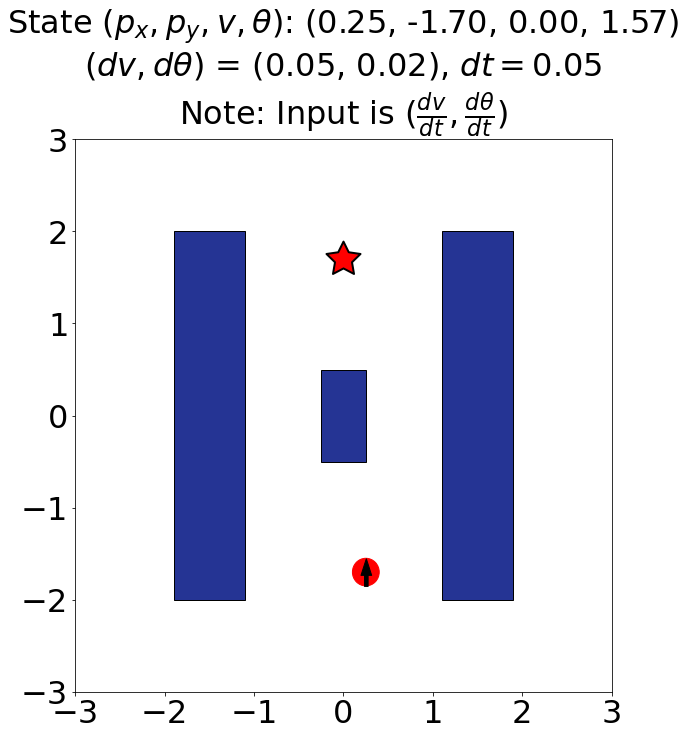

In [6]:
for path_id, path, action in zip(range(len(paths)), paths, actions):
    x, y, _, _ = path[0][0]
    action.append(action[-1])
    env.save_fig(path, env.world.agent_goals, env.world.obstacles, 
                 f'gifs/0817/dynamic_{path_id}.mp4', 
                 title=[generate_title(p, a) for p, a in zip(path, action)])

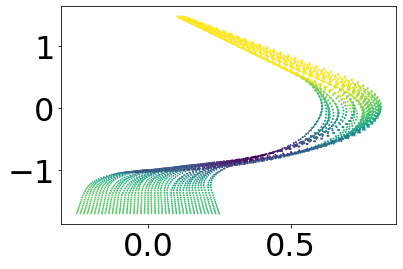

In [22]:
import matplotlib.pyplot as plt
for path in paths:
    plt.scatter(*np.array(path)[:, :2].T)
plt.show()

In [213]:
good_arrow_infos = []
boundary_arrow_infos = []
bad_arrow_infos = []
danger_arrow_infos = []
interval = 1

for path, bad, admissible, boundary, danger in zip(paths, bads, admissibles, boundaries, dangers):
    interval_path = path[::interval]
    next_interval_path = path[1::interval]

    for prev_state, next_state, bbd, ad, bd, dan in zip(interval_path, next_interval_path, bad, admissible, boundary, danger):
        prev_state = prev_state.reshape(-1)
        next_state = next_state.reshape(-1)    
        if ad:
            good_arrow_infos.append([prev_state[0], prev_state[1], next_state[0], next_state[1]]) 
        elif bbd:
            bad_arrow_infos.append([prev_state[0], prev_state[1], next_state[0], next_state[1]])            
        elif bd:
            boundary_arrow_infos.append([prev_state[0], prev_state[1], next_state[0], next_state[1]])
        elif dan:
            danger_arrow_infos.append([prev_state[0], prev_state[1], next_state[0], next_state[1]])            

In [219]:
(len(boundary_arrow_infos))/(len(danger_arrow_infos)+len(good_arrow_infos)+len(boundary_arrow_infos)+len(bad_arrow_infos))

0.2766726943942134

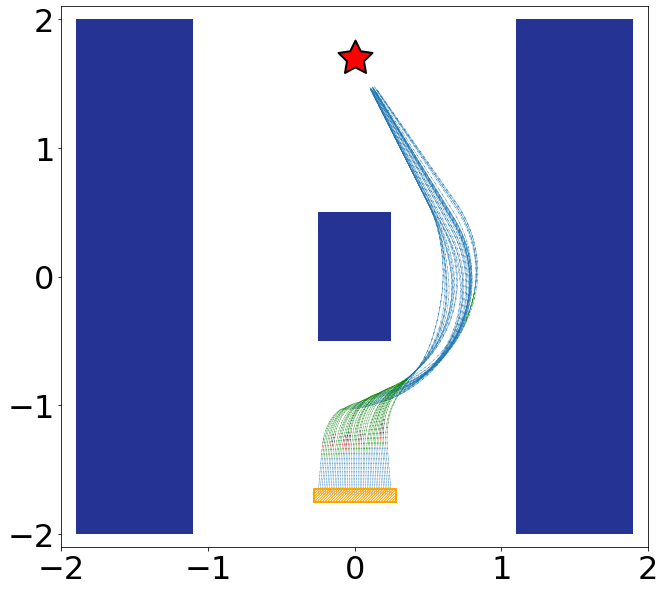

In [215]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.colors import hsv_to_rgb

plt.rcParams.update({'font.size': 32})


plt.clf()
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 9))

def initColors(num_agents):
    c={a+1:hsv_to_rgb(np.array([a/float(num_agents),1,1])) for a in range(num_agents)}
    return c    

interval = 1

arrows = [patches.FancyArrow(x1, y1, x2-x1, y2-y1,
                                  length_includes_head=True, width=0.002, head_length=0.5*((x2-x1)**2+(y2-y1)**2)**0.5) for x1, y1, x2, y2 in good_arrow_infos]
agent_arrows = PatchCollection(arrows)#, color=color, facecolor=color, edgecolor=color)
ax.add_collection(agent_arrows)

arrows = [patches.FancyArrow(x1, y1, x2-x1, y2-y1,
                                  length_includes_head=True, width=0.002, head_length=0.5*((x2-x1)**2+(y2-y1)**2)**0.5) for x1, y1, x2, y2 in bad_arrow_infos]
agent_arrows = PatchCollection(arrows, facecolor='red')
ax.add_collection(agent_arrows)

arrows = [patches.FancyArrow(x1, y1, x2-x1, y2-y1,
                                  length_includes_head=True, width=0.002, head_length=0.5*((x2-x1)**2+(y2-y1)**2)**0.5) for x1, y1, x2, y2 in boundary_arrow_infos]
agent_arrows = PatchCollection(arrows, facecolor='green')
ax.add_collection(agent_arrows)

arrows = [patches.FancyArrow(x1, y1, x2-x1, y2-y1,
                                  length_includes_head=True, width=0.002, head_length=0.5*((x2-x1)**2+(y2-y1)**2)**0.5) for x1, y1, x2, y2 in danger_arrow_infos]
agent_arrows = PatchCollection(arrows, facecolor='black')
ax.add_collection(agent_arrows)

# set the limits of the plot to the limits of the data
ax.axis([-2, 2, -2.1, 2.1])

for obstacle in env.world.obstacles:
        center_x, center_y, dx, dy = obstacle
        rectangle = patches.Rectangle((center_x-dx, center_y-dy), 2*dx, 2*dy, 
                                      linewidth=0, edgecolor='black', facecolor='#253494')
        plt.gca().add_patch(rectangle)
colors=env.initColors()
for color, agent, goal in zip(colors.values(), env.world.agents, env.world.agent_goals):
    plt.scatter(goal[0], goal[1], s=1280, color='none', linewidths=2, marker=(5, 1), facecolors=['red'], edgecolors=['black'], zorder=3)

rectangle = patches.Rectangle((-0.28, -1.7-0.05), 0.56, 0.1, 
                              linewidth=2, edgecolor='orange', facecolor='none', hatch='/////////', zorder=4)
plt.gca().add_patch(rectangle)
    
# ax.set_xticks([-3,-2,-1,0,1,2,3])
fig.tight_layout()
plt.savefig('dynamic_dubins.pdf')
plt.show()